In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Iris.csv')
data.drop(['Id'],inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info() # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Feature Engineering

In [6]:
# Get average values for all features for each iris species
def feature_averages(iris_species,data):
    iris_species = data[data['Species'] == iris_species]
    avgSepalLength = iris_species['SepalLengthCm'].mean()
    avgSepalWidth = iris_species['SepalWidthCm'].mean()
    avgPetalLength = iris_species['PetalLengthCm'].mean()
    avgPetalWidth = iris_species['PetalWidthCm'].mean()
    return avgSepalLength, avgSepalWidth, avgPetalLength, avgPetalWidth

In [7]:
# Averages : avgSepalLength, avgSepalWidth, avgPetalLength, avgPetalWidth
setosa_avg = feature_averages('Iris-setosa',data)
versicolor_avg = feature_averages('Iris-versicolor', data)
virginica_avg = feature_averages('Iris-virginica',data)

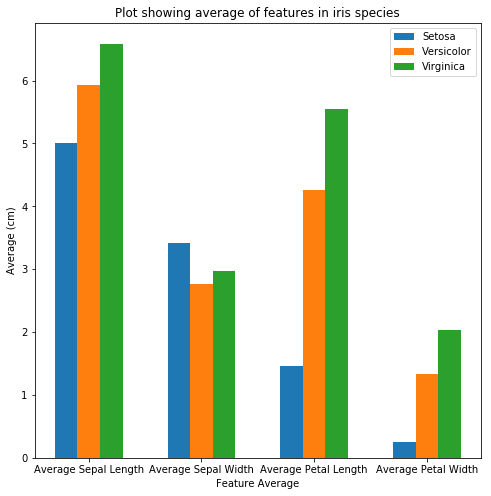

In [8]:
plt.figure(figsize=(8,8))
index = np.arange(4)
bar_width = 0.2
plt.xticks(index + bar_width,('Average Sepal Length', 'Average Sepal Width', 
                              'Average Petal Length', 'Average Petal Width'))
plt.xlabel('Feature Average')
plt.ylabel('Average (cm)')
plt.title('Plot showing average of features in iris species')

plt.bar(index, setosa_avg, bar_width, label='Setosa')
plt.bar(index + bar_width, versicolor_avg, bar_width, label= 'Versicolor')
plt.bar(index + 2*bar_width, virginica_avg, bar_width, label='Virginica')

plt.legend()
plt.show()

In [9]:
# Get the sepeal and petal area

def area(data,species):
    iris = data[data['Species'] == species]
    petal_length = iris['PetalLengthCm']
    petal_width = iris['PetalWidthCm']
    sepal_length = iris['SepalLengthCm']
    sepal_width = iris['SepalWidthCm']

    petal_area = np.multiply(petal_length,petal_width)
    sepal_area = np.multiply(sepal_length,sepal_width)
    return petal_area.mean(),sepal_area.mean()

In [10]:
setosa_area = area(data,'Iris-setosa')
virginica_area = area(data,'Iris-virginica')
versicolor_area = area(data,'Iris-versicolor')

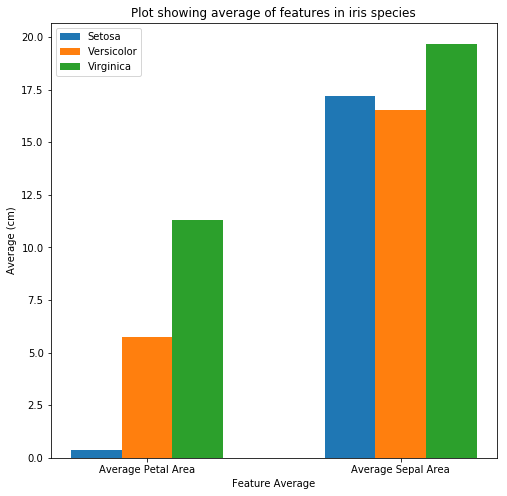

In [11]:
plt.figure(figsize=(8,8))
index = np.arange(2)
bar_width = 0.2
plt.xticks(index + bar_width,('Average Petal Area', 'Average Sepal Area'))
plt.xlabel('Feature Average')
plt.ylabel('Average (cm)')
plt.title('Plot showing average of features in iris species')

plt.bar(index, setosa_area, bar_width, label='Setosa')
plt.bar(index + bar_width, versicolor_area, bar_width, label= 'Versicolor')
plt.bar(index + 2*bar_width, virginica_area, bar_width, label='Virginica')

plt.legend()
plt.show()

In [234]:
# Add Petal Area and Sepal Area feature

petal_area = np.multiply(data['PetalLengthCm'],data['PetalWidthCm'])
sepal_area = np.multiply(data['SepalLengthCm'], data['SepalWidthCm'])
data['PetalAreaCm'] = petal_area
data['SepalAreaCm'] = sepal_area
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalAreaCm,SepalAreaCm
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


In [235]:
# Petal/Sepal Length to Width Ratio

def ratios(data,species):
    iris = data[data['Species'] == species]
    petal_length = iris['PetalLengthCm']
    petal_width = iris['PetalWidthCm']
    sepal_length = iris['SepalLengthCm']
    sepal_width = iris['SepalWidthCm']
    
    petal_ratio = np.divide(petal_width,petal_length)
    sepal_ratio = np.divide(sepal_width,sepal_length)
    
    return petal_ratio.mean(), sepal_ratio.mean()

In [236]:
setosa_ratio = ratios(data,'Iris-setosa')
virginica_ratio = ratios(data,'Iris-virginica')
versicolor_ratio = ratios(data,'Iris-versicolor')

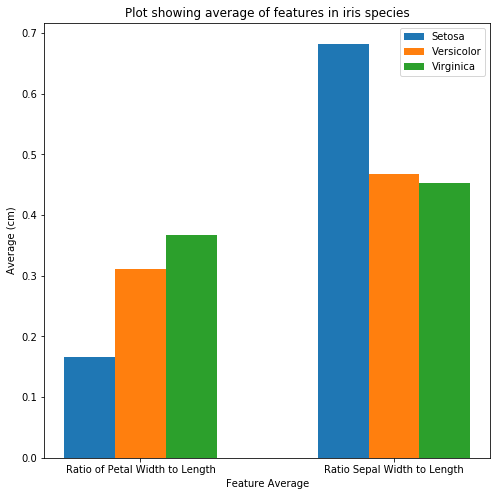

In [237]:
plt.figure(figsize=(8,8))
index = np.arange(2)
bar_width = 0.2
plt.xticks(index + bar_width,('Ratio of Petal Width to Length', 
                              'Ratio Sepal Width to Length'))

plt.xlabel('Feature Average')
plt.ylabel('Average (cm)')
plt.title('Plot showing average of features in iris species')

plt.bar(index, setosa_ratio, bar_width, label='Setosa')
plt.bar(index + bar_width, versicolor_ratio, bar_width, label= 'Versicolor')
plt.bar(index + 2*bar_width, virginica_ratio, bar_width, label='Virginica')

plt.legend()
plt.show()

Not an extremely useful feature

# Training

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF

In [303]:
x = data.drop(['Species'],axis=1)
y = data['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, shuffle=True)

In [304]:
clfKNN = KNN(5, weights='distance')
clfKNN.fit(x_train,y_train)

clfRF = RF()
clfRF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Testing Accuracy

In [305]:
from sklearn.metrics import accuracy_score

In [306]:
y_pred = clfKNN.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [307]:
y_pred = clfRF.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

Results depend on the shuffling of the dataset. The accuracy lies between 94-100%